# Data Management

In [ ]:
 # Upload train_data.csv
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train_data.csv")
# df.fillna(0, inplace=True)  # Nan Handle

df.head()

,session_duration_seconds,mean_tap_duration_ms,std_tap_duration_ms,tap_frequency_per_sec,mean_swipe_speed,std_swipe_speed,mean_swipe_distance,std_swipe_distance,tap_zone_x,tap_zone_y,swipe_zone_x,swipe_zone_y,mean_screen_duration,std_screen_duration,fd_broken,loan_taken,time_from_login_to_fd,time_from_login_to_loan,time_from_login_transaction,label
0,56.077903,3558.271849,3285.414117,0.264273,0.676760,1.028433,88.047178,97.364845,1.534198,0.960799,1.652011,1.400054,32.674085,17.647131,1,0,31.213551,0.000000,21.516218,1
1,226.598899,6852.886155,23966.139552,0.074695,0.041665,0.030681,95.519370,41.615090,0.681342,1.145925,1.243435,1.247040,92.080406,59.011915,0,1,0.000000,166.017301,0.000000,0
2,38.406961,3436.501488,2590.948671,0.223217,1.631067,0.587619,98.892371,31.962758,2.128651,1.495760,1.978184,1.442129,27.751949,23.556839,1,0,18.880438,0.000000,0.000000,1
3,67.942564,1165.842947,2498.062339,0.540615,0.789470,0.531746,122.398379,93.456830,0.999485,1.188669,1.110688,1.176117,17.765071,17.809582,0,1,0.000000,84.073289,69.279362,1
4,47.554991,1005.016836,3453.254866,0.320777,0.488023,0.848672,73.242211,45.681517,1.328186,1.126555,1.583186,1.190321,19.320581,17.563147,1,0,36.454238,0.000000,0.000000,1


/tmp/ipython-input-49-1998848565.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="muted")


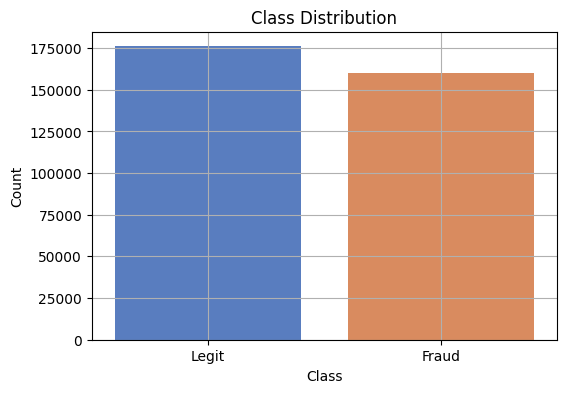

In [ ]:
def plot_class_distribution(df, label_col="label"):
    class_counts = df[label_col].value_counts()
    plt.figure(figsize=(6, 4))
    sns.barplot(x=class_counts.index, y=class_counts.values, palette="muted")
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.xticks([0, 1], ["Legit", "Fraud"])
    plt.grid(True)
    plt.show()

plot_class_distribution(df)

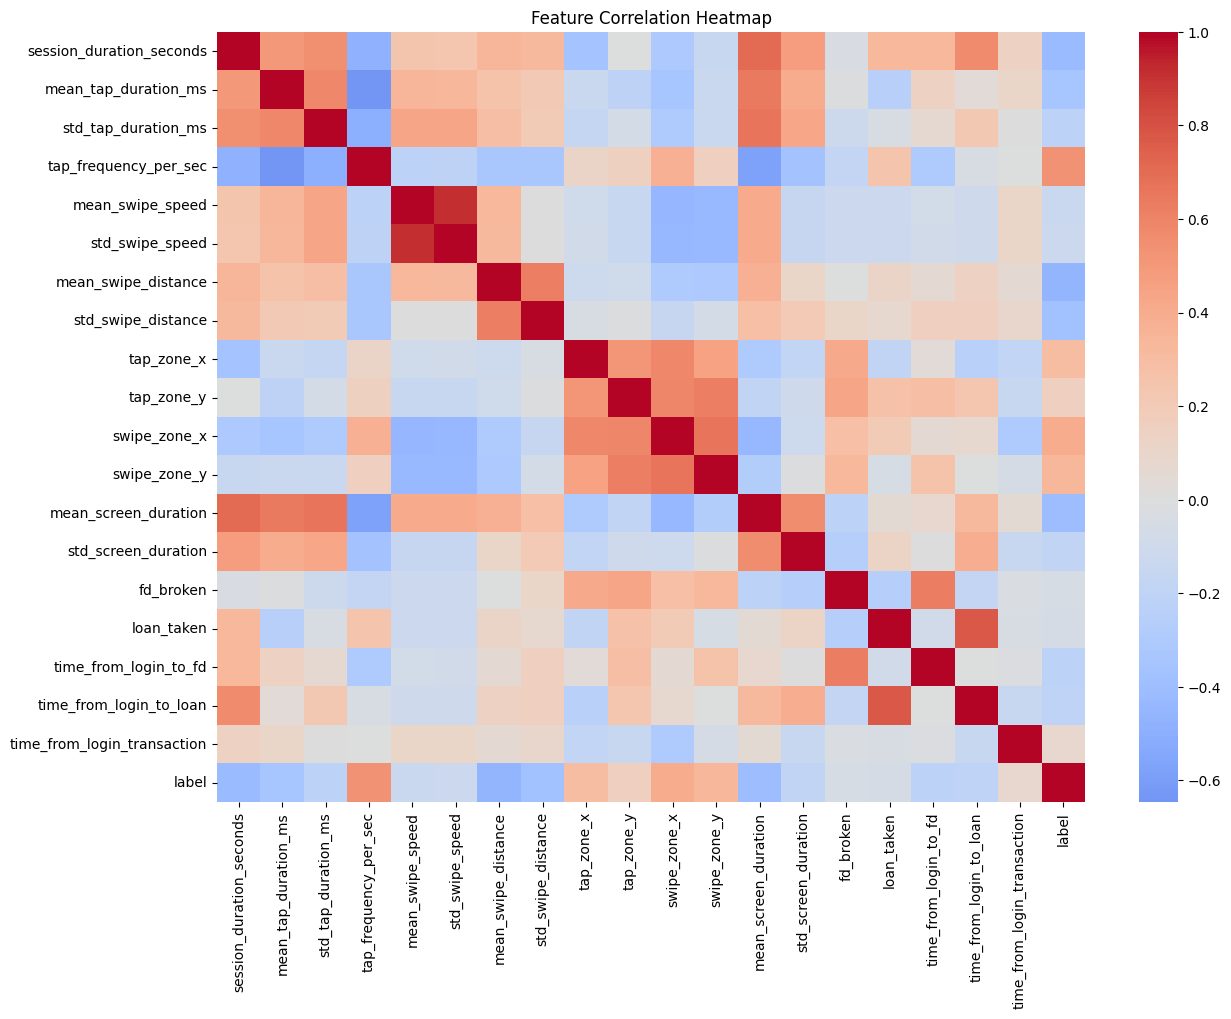

In [ ]:
def plot_correlation_heatmap(df):
    plt.figure(figsize=(14, 10))
    corr = df.corr()
    sns.heatmap(corr, cmap="coolwarm", center=0, annot=False, fmt=".2f")
    plt.title("Feature Correlation Heatmap")
    plt.show()

plot_correlation_heatmap(df)


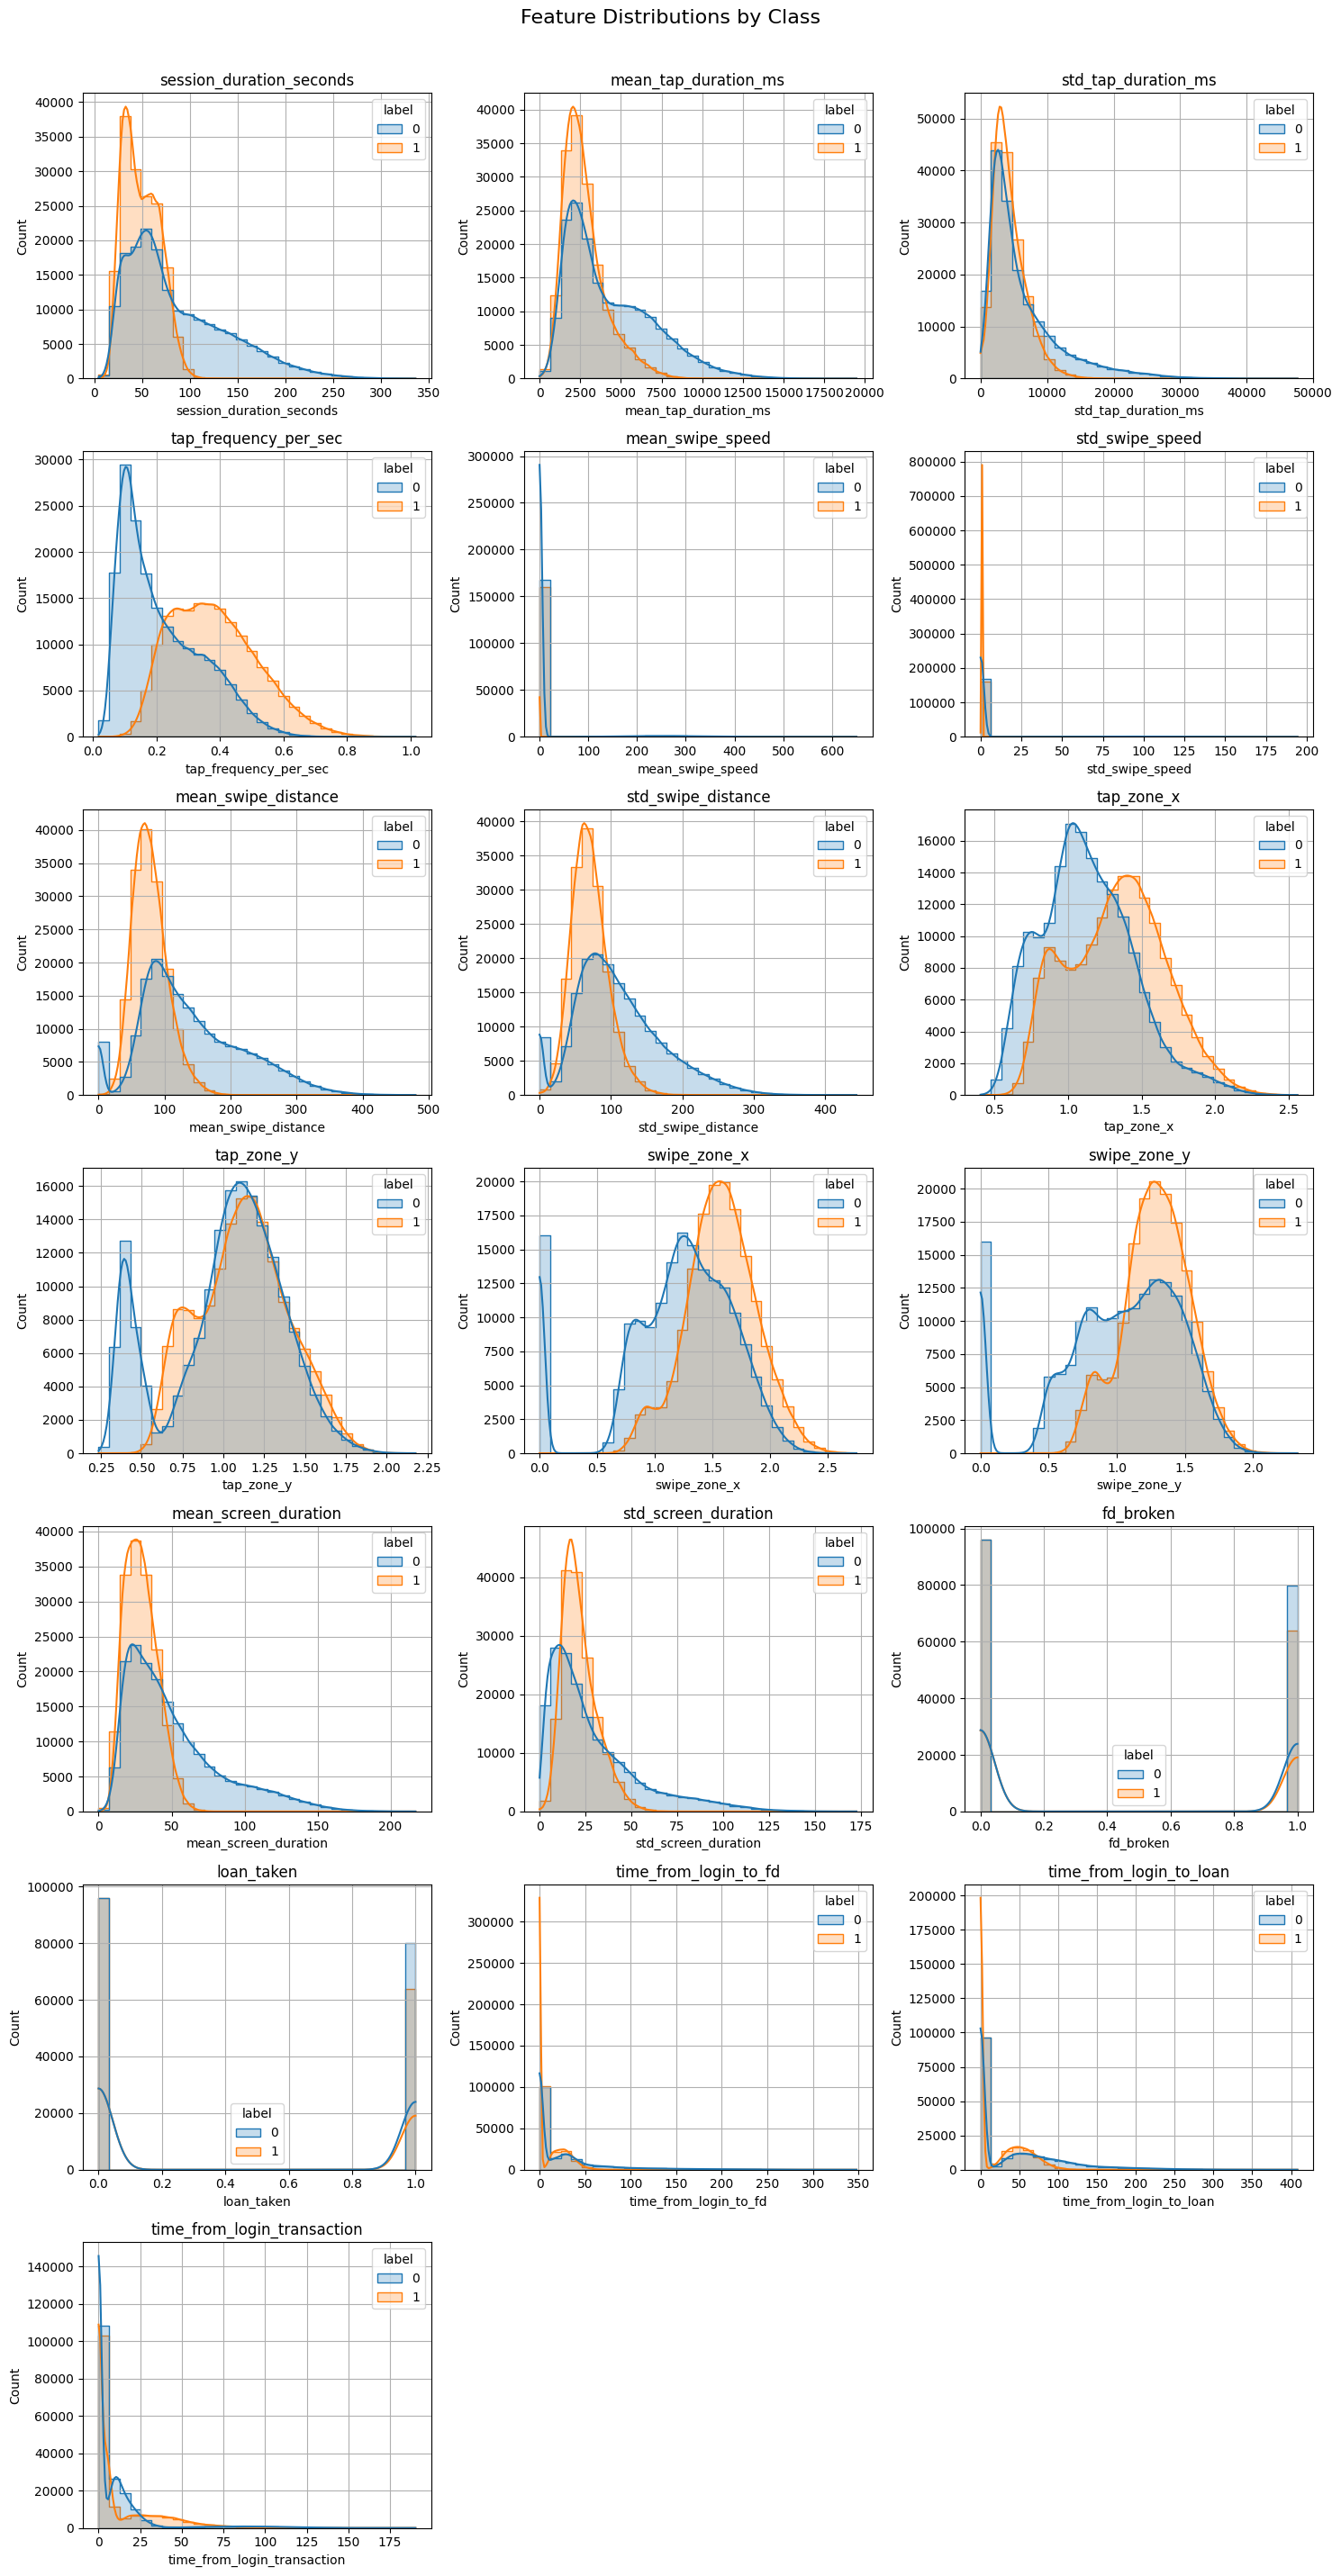

In [ ]:
import math

def plot_feature_distributions_grid(df, features, label_col="label", cols=3):
    total = len(features)
    rows = math.ceil(total / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(features):
        sns.histplot(data=df, x=col, hue=label_col, bins=30, kde=True, element="step", ax=axes[i])
        axes[i].set_title(f"{col}")
        axes[i].grid(True)

    # Turn off empty subplots if features don't fill the grid
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    fig.tight_layout()
    fig.suptitle("Feature Distributions by Class", fontsize=16, y=1.02)
    plt.show()

# Call the function
plot_feature_distributions_grid(df, df.columns.drop("label"))


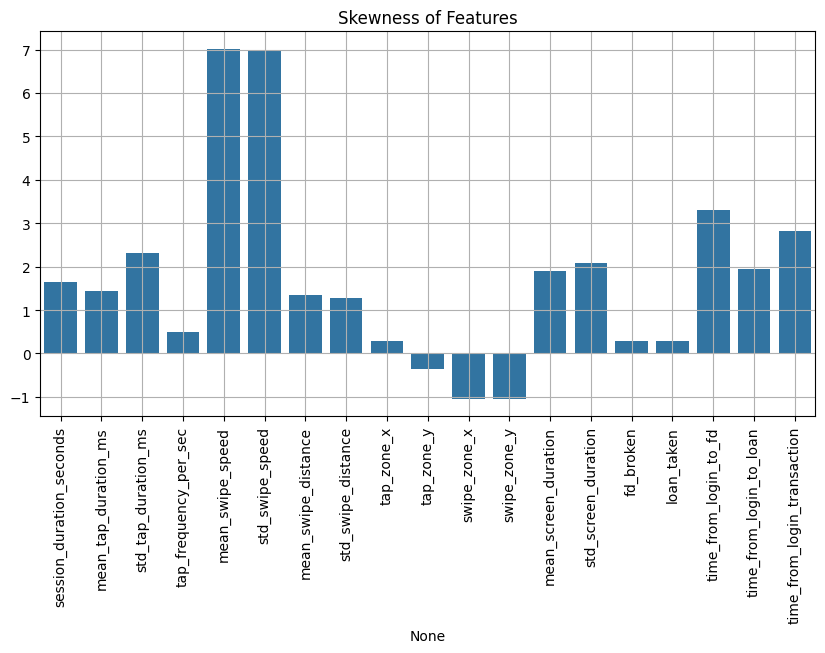

In [ ]:
def plot_skewness(df):
    from scipy.stats import skew
    skew_vals = df.drop("label", axis=1).apply(skew)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=skew_vals.index, y=skew_vals.values)
    plt.title("Skewness of Features")
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

plot_skewness(df)

# Training

In [ ]:
# TO upload training csv data
from google.colab import files
uploaded = files.upload()

Saving train_data.csv to train_data.csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import os

In [ ]:
# Load Data
df = pd.read_csv("train_data.csv")
df.fillna(0, inplace=True)

# Separate features n labels
X = df.drop(columns=["label"])
y = df["label"]

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler.joblib")

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Tiny Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1],)),   # Input layer 18 feat
    tf.keras.layers.Dense(8, activation='relu'),  # 8 neurons
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10, batch_size=32, verbose=1
)

# Evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Export Model
model.save("model_light.h5")  # /content/
print("Saved model as model_light.h5")


Epoch 1/10
8400/8400 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8884 - loss: 0.2554 - val_accuracy: 0.9790 - val_loss: 0.0694
Epoch 2/10
8400/8400 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9829 - loss: 0.0594 - val_accuracy: 0.9874 - val_loss: 0.0428
Epoch 3/10
8400/8400 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9881 - loss: 0.0395 - val_accuracy: 0.9889 - val_loss: 0.0340
Epoch 4/10
8400/8400 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9897 - loss: 0.0326 - val_accuracy: 0.9897 - val_loss: 0.0293
Epoch 5/10
8400/8400 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9910 - loss: 0.0281 - val_accuracy: 0.9912 - val_loss: 0.0258
Epoch 6/10
8400/8400 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9919 - loss: 0.0249 - val_accuracy: 0.9908 - val_loss: 0.0254
Epoch 7/10
8400/8400 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9926 - loss: 0.0227 - val_accuracy: 0.9926 - val_loss: 0.0214
Epoch 8/10
8400/8400 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9926 - loss: 0


Confusion Matrix:
 [[35028   172]
 [  227 31773]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     35200
           1       0.99      0.99      0.99     32000

    accuracy                           0.99     67200
   macro avg       0.99      0.99      0.99     67200
weighted avg       0.99      0.99      0.99     67200

Saved model as model_light.h5


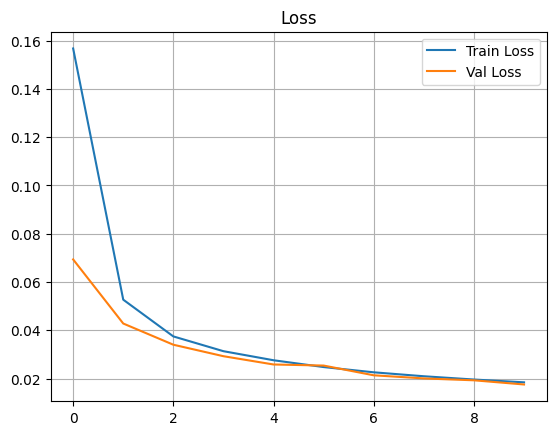

In [ ]:
# MOdel Loss Plot
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss")
plt.legend()
plt.grid(True)
plt.show()

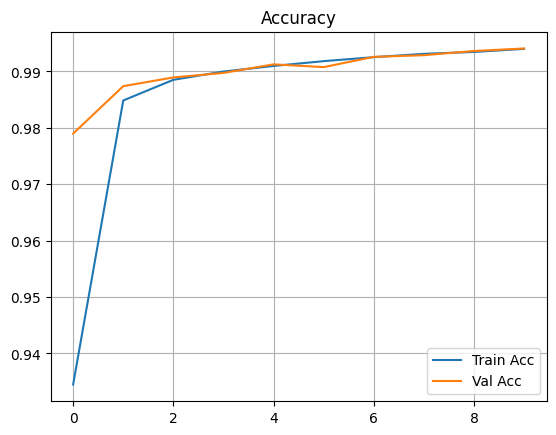

In [ ]:
#Model accuracy plot
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import tensorflow as tf

# Load model
model = tf.keras.models.load_model("model_light.h5")

# Convert to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save TFLite model
with open("model_light.tflite", "wb") as f:
    f.write(tflite_model)

print("Converted and saved as model_light.tflite")


Saved artifact at '/tmp/tmpv92o87ej'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 19), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133351171418704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133351171417168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133351171414672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133351171417936: TensorSpec(shape=(), dtype=tf.resource, name=None)
Converted and saved as model_light.tflite


# Testing

In [ ]:
#Choose test data
from google.colab import files
uploaded = files.upload()

Saving noisy_test_data_2.csv to noisy_test_data_2.csv


In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve,
    roc_auc_score, precision_recall_curve, ConfusionMatrixDisplay,
    accuracy_score, recall_score
)
from tensorflow import keras

In [ ]:
# Paths
MODEL_PATH = "model_light.h5"
SCALER_PATH = "scaler.joblib"
TEST_CSV = "noisy_test_data_2.csv"
VALIDATION_THRESHOLD = 0.45

FEATURE_COLS = [
    "session_duration_seconds",
    "mean_tap_duration_ms",
    "std_tap_duration_ms",
    "tap_frequency_per_sec",
    "mean_swipe_speed",
    "std_swipe_speed",
    "mean_swipe_distance",
    "std_swipe_distance",
    "tap_zone_x",
    "tap_zone_y",
    "swipe_zone_x",
    "swipe_zone_y",
    "mean_screen_duration",
    "std_screen_duration",
    "fd_broken",
    "loan_taken",
    "time_from_login_to_fd",
    "time_from_login_to_loan",
    "time_from_login_transaction"
]

In [ ]:
def load_and_predict():
    df_test = pd.read_csv(TEST_CSV)
    X_test = df_test[FEATURE_COLS]
    y_test = df_test["label"].values

    scaler = joblib.load(SCALER_PATH)
    X_test_scaled = scaler.transform(X_test)

    model = keras.models.load_model(MODEL_PATH)
    y_probs = model.predict(X_test_scaled).flatten()
    y_pred = (y_probs > VALIDATION_THRESHOLD).astype(int)

    return y_test, y_probs, y_pred

# Run inference
y_test, y_probs, y_pred = load_and_predict()


657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


In [ ]:
def print_metrics(y_test, y_pred, y_probs):
    acc = accuracy_score(y_test, y_pred) * 100
    recall_fraud = recall_score(y_test, y_pred, pos_label=1) * 100
    recall_legit = recall_score(y_test, y_pred, pos_label=0) * 100
    auc_score = roc_auc_score(y_test, y_probs)

    print(f"Using threshold = {VALIDATION_THRESHOLD:.2f}\n")
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred))

    print(f"\n=== Metrics (threshold={VALIDATION_THRESHOLD:.2f}) ===")
    print(f"Accuracy                : {acc:.2f}%")
    print(f"Fraud Detection Recall  : {recall_fraud:.2f}%")
    print(f"Legit Detection Recall  : {recall_legit:.2f}%")
    print(f"AUC Score               : {auc_score:.4f}")
    print(f"Probability range       : min={y_probs.min():.5e}, max={y_probs.max():.5f}, mean={y_probs.mean():.5f}")

print_metrics(y_test, y_pred, y_probs)

Using threshold = 0.45

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10999
           1       0.95      0.93      0.94     10000

    accuracy                           0.95     20999
   macro avg       0.95      0.95      0.95     20999
weighted avg       0.95      0.95      0.95     20999


=== Metrics (threshold=0.45) ===
Accuracy                : 94.75%
Fraud Detection Recall  : 93.40%
Legit Detection Recall  : 95.97%
AUC Score               : 0.9877
Probability range       : min=0.00000e+00, max=1.00000, mean=0.46203


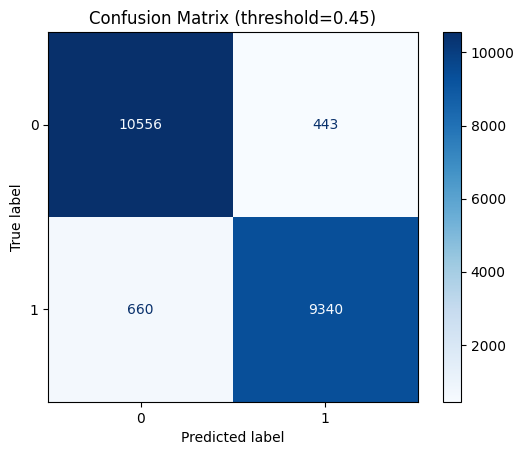

In [ ]:
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix (threshold={VALIDATION_THRESHOLD:.2f})")
    plt.show()

plot_confusion_matrix(y_test, y_pred)


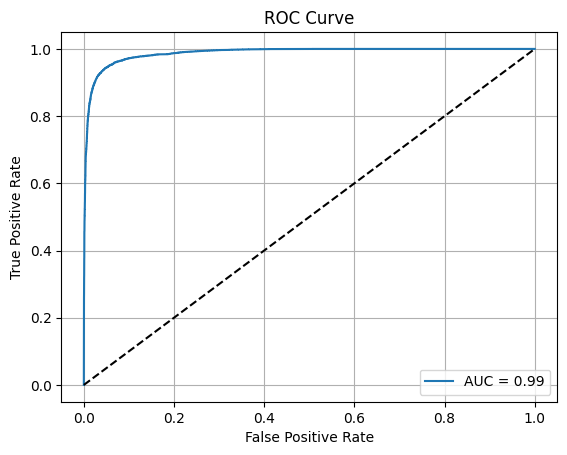

In [ ]:
def plot_roc(y_test, y_probs):
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()

plot_roc(y_test, y_probs)


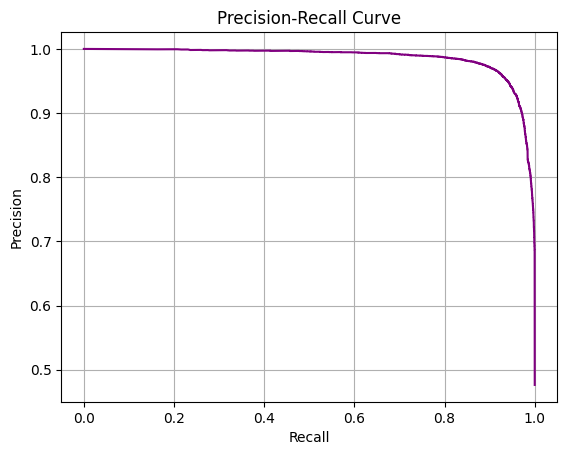

In [ ]:
def plot_precision_recall(y_test, y_probs):
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    plt.figure()
    plt.plot(recall, precision, color='purple')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.grid()
    plt.show()

plot_precision_recall(y_test, y_probs)


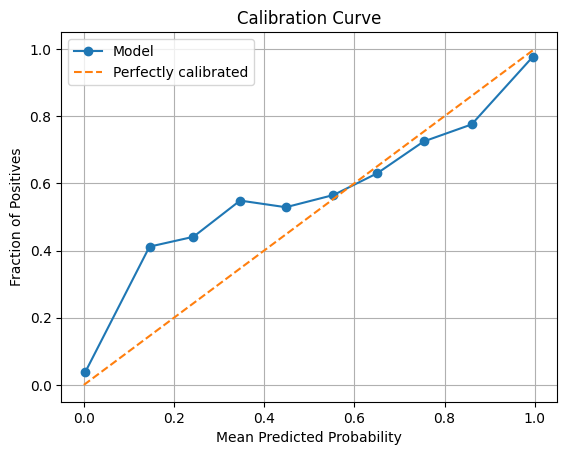

In [ ]:
#Compares predicted probabilities with actual outcomes
from sklearn.calibration import calibration_curve

def plot_calibration_curve(y_test, y_probs):
    prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10, strategy='uniform')
    plt.figure()
    plt.plot(prob_pred, prob_true, marker='o', label='Model')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
    plt.xlabel("Mean Predicted Probability")
    plt.ylabel("Fraction of Positives")
    plt.title("Calibration Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_calibration_curve(y_test, y_probs)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


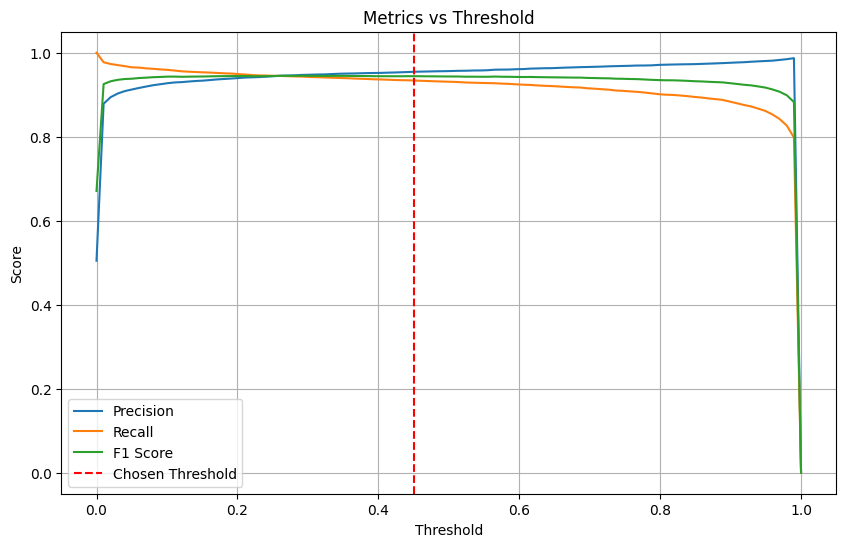

In [ ]:
#how metrics like F1, precision, recall change as you vary the threshold
from sklearn.metrics import precision_score, recall_score, f1_score

def plot_threshold_metrics(y_test, y_probs):
    thresholds = np.linspace(0.0, 1.0, 100)
    precisions = []
    recalls = []
    f1s = []

    for t in thresholds:
        y_pred_t = (y_probs > t).astype(int)
        precisions.append(precision_score(y_test, y_pred_t))
        recalls.append(recall_score(y_test, y_pred_t))
        f1s.append(f1_score(y_test, y_pred_t))

    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precisions, label="Precision")
    plt.plot(thresholds, recalls, label="Recall")
    plt.plot(thresholds, f1s, label="F1 Score")
    plt.axvline(VALIDATION_THRESHOLD, color='red', linestyle='--', label='Chosen Threshold')
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title("Metrics vs Threshold")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_threshold_metrics(y_test, y_probs)
